In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [48]:
data=pd.read_csv("data.csv")

In [49]:
#reading the top 5 data 
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [50]:
#dropping region names and Region code to make data national, longitude and latitude to make data compact
data.drop(["RegionCode","RegionName","Latitude","Longitude"], axis=1, inplace=True)

In [77]:
data.head()

,SNo,Date,Country,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
1,1,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
2,2,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
3,3,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
4,4,2020-02-24T18:00:00,ITA,10,2,12,6,18,18,0,0,18,0.0


In [51]:
#replacing the non vailanle data as zero to make computation possible
data.replace(np.nan,0, inplace=True) 

In [59]:
data.head()

,SNo,Date,Country,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
1,1,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
2,2,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
3,3,2020-02-24T18:00:00,ITA,0,0,0,0,0,0,0,0,0,0.0
4,4,2020-02-24T18:00:00,ITA,10,2,12,6,18,18,0,0,18,0.0


In [70]:
#converting data for each day and summing the variables accroding to 
datac=data.groupby(['Date'])[['HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','CurrentPositiveCases','NewPositiveCases','Recovered','Deaths','TotalPositiveCases','TestsPerformed']].sum()

In [69]:
datac.head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,
2020-02-24T18:00:00,101,26,127,94,221,221,1,7,229,0.0
2020-02-25T18:00:00,114,35,149,162,311,93,1,10,322,0.0
2020-02-26T18:00:00,128,36,164,221,385,78,3,12,400,0.0
2020-02-27T18:00:00,248,56,304,284,588,250,45,17,650,0.0
2020-02-28T18:00:00,345,64,409,412,821,238,46,21,888,0.0


In [72]:
datac.describe()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02
mean,9191.419890,1036.734807,10228.154696,32421.182320,42649.337017,1426.613260,115644.386740,25547.972376,183841.696133,2.034585e+06
std,9838.947896,1284.478029,11082.251097,26525.837552,35750.049580,1680.251765,79242.290704,12577.665675,84091.846458,1.611952e+06
min,101.000000,26.000000,127.000000,94.000000,221.000000,78.000000,1.000000,7.000000,229.000000,0.000000e+00
25%,826.000000,67.000000,901.000000,11890.000000,13179.000000,251.000000,28470.000000,18279.000000,143626.000000,0.000000e+00
50%,4729.000000,351.000000,5049.000000,19185.000000,25909.000000,531.000000,140479.000000,32785.000000,229858.000000,2.198632e+06
75%,16270.000000,1694.000000,18302.000000,54422.000000,75528.000000,2313.000000,193640.000000,34914.000000,242149.000000,3.463179e+06
max,29010.000000,4068.000000,33004.000000,83652.000000,108257.000000,6557.000000,205203.000000,35430.000000,258136.000000,4.692505e+06


# Relating the variables with scatterplots

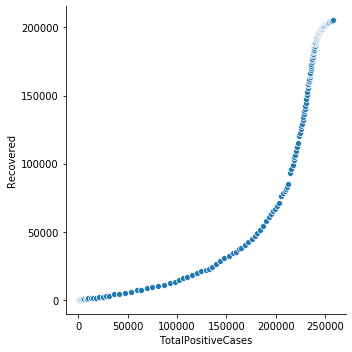

In [80]:
#Totalpositive cases vs Recovered
sns.relplot(x="TotalPositiveCases", y="Recovered", data=datac)

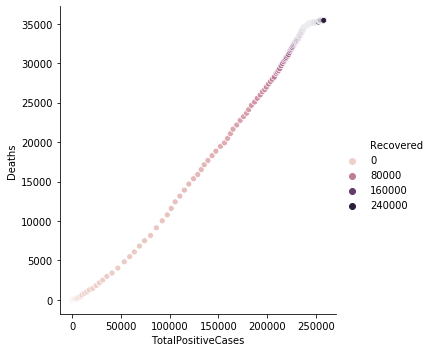

In [84]:
#Total Positive Case vs deaths
sns.relplot(x="TotalPositiveCases", y="Deaths",hue="Recovered", data=datac)

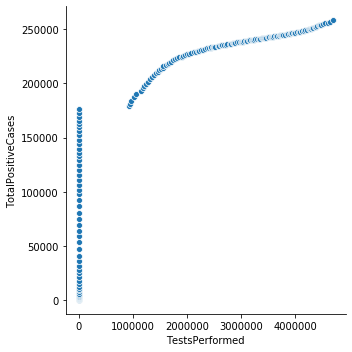

In [83]:
sns.relplot(x="TestsPerformed", y="TotalPositiveCases", data=datac)

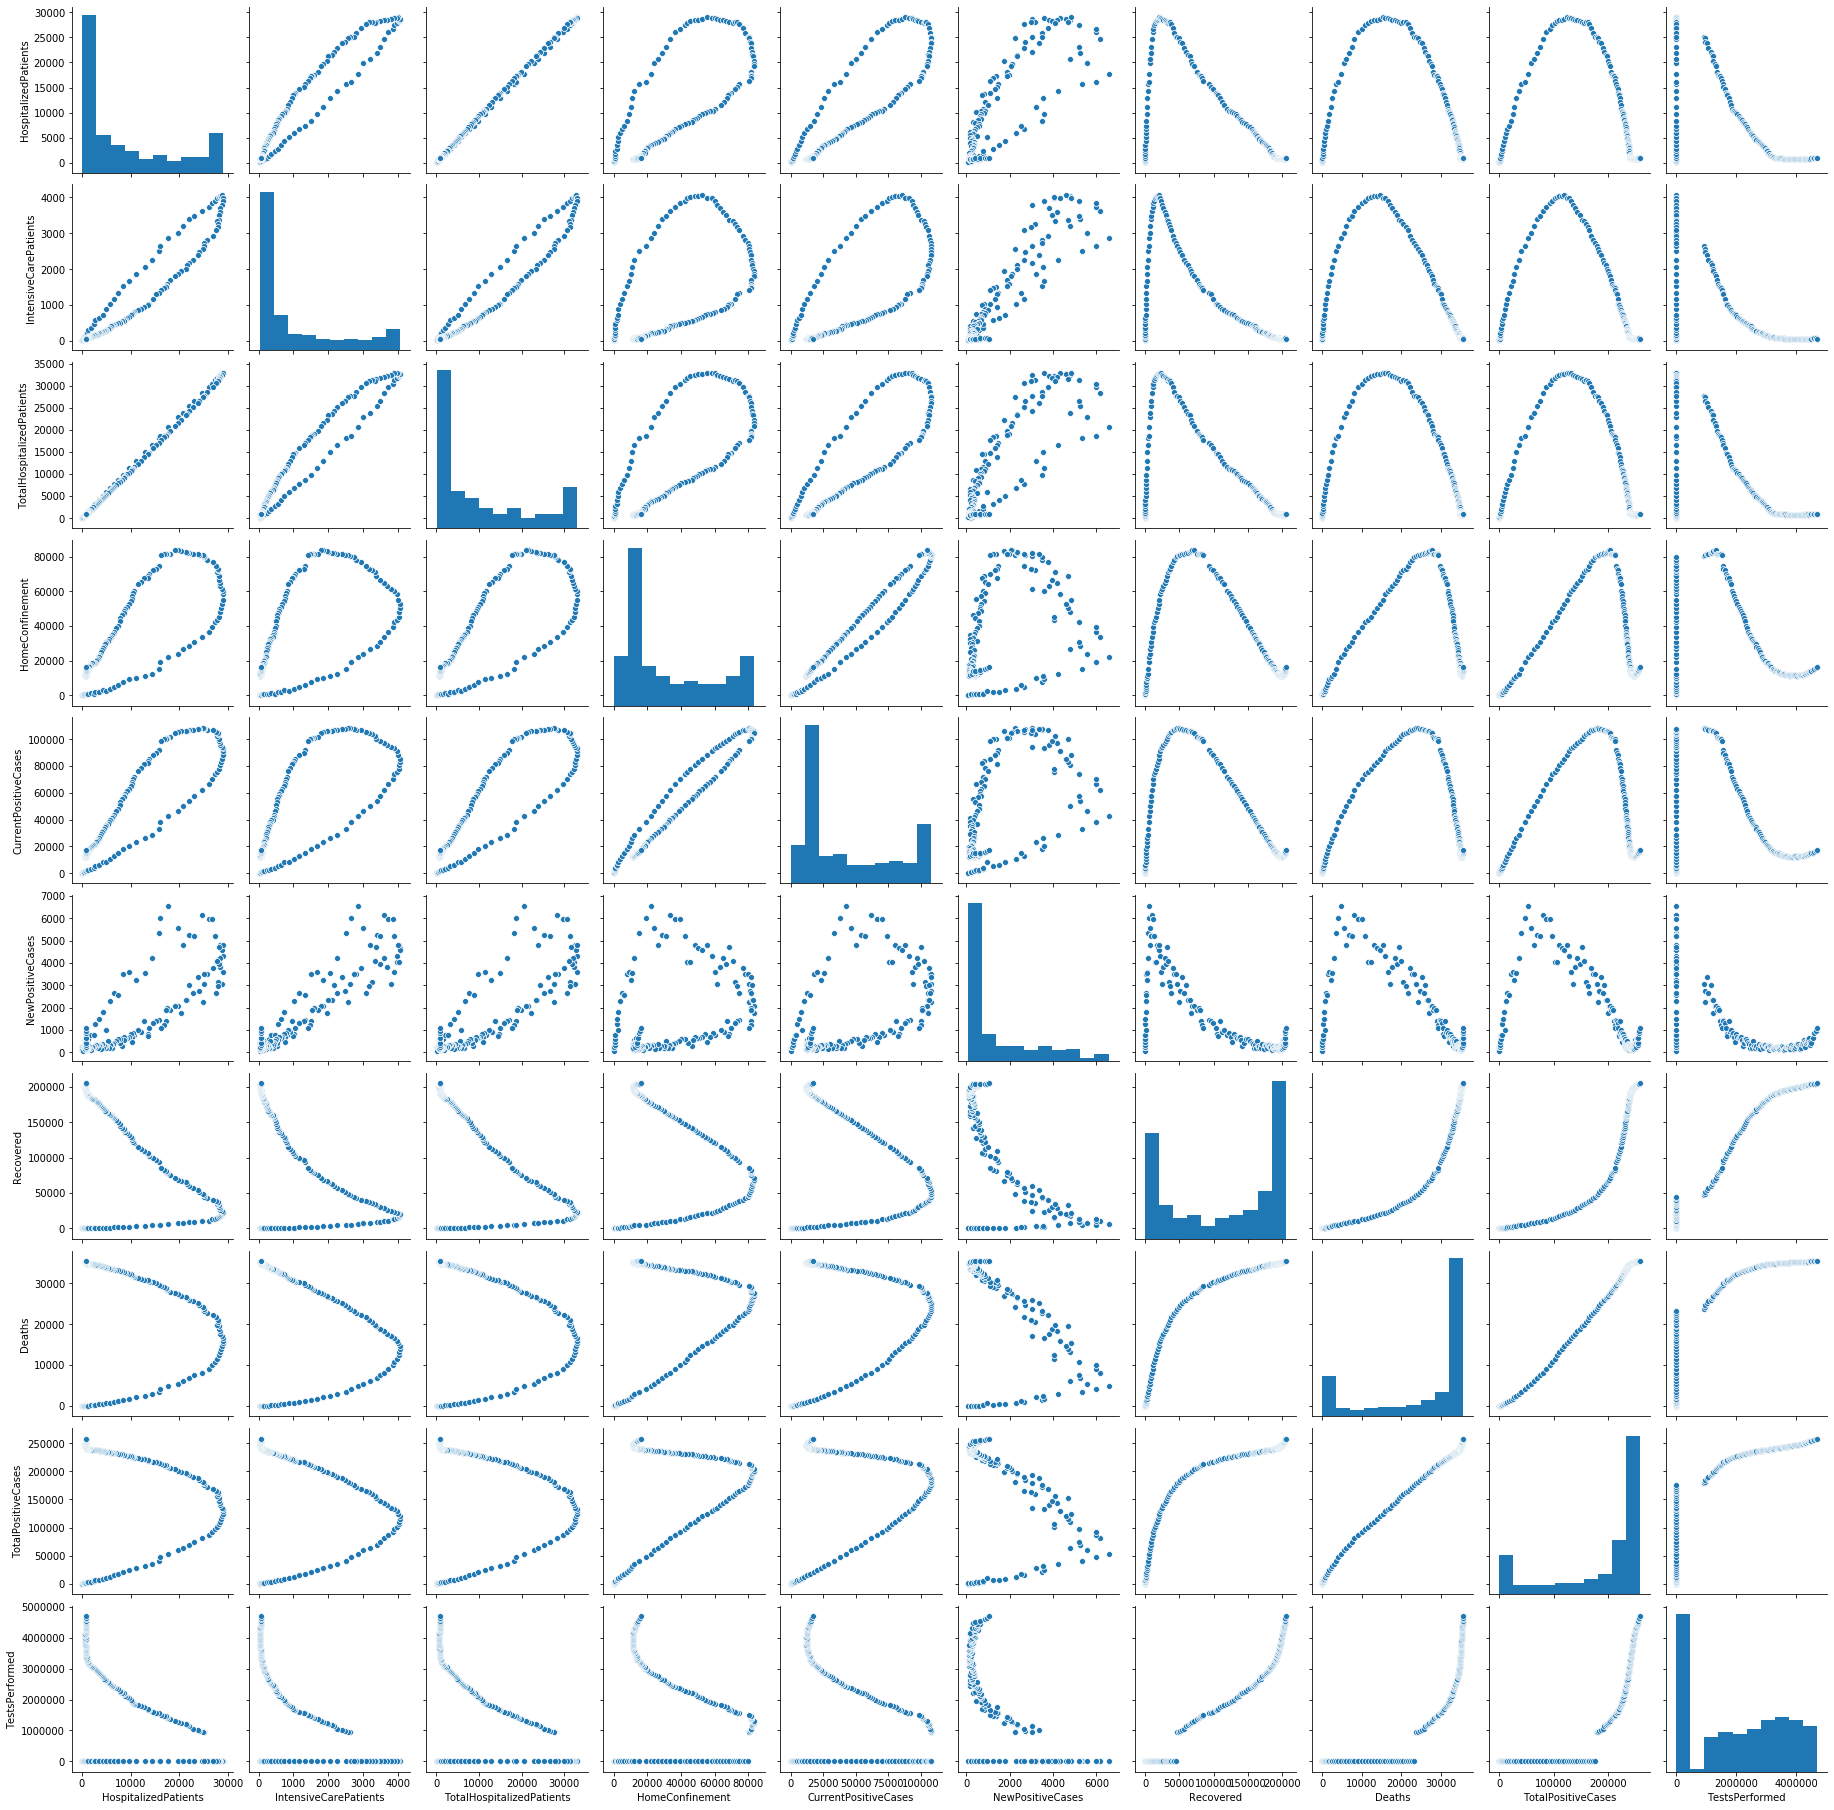

In [85]:
#whole picture of the dataset with relationship between each other 
sns.pairplot(datac)

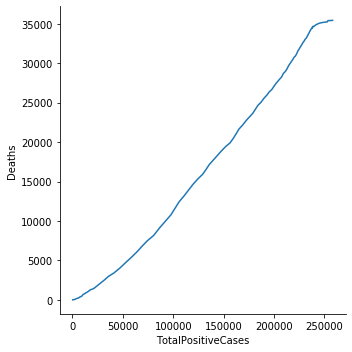

In [88]:
sns.relplot(x="TotalPositiveCases", y="Deaths", kind ="line", data=datac)

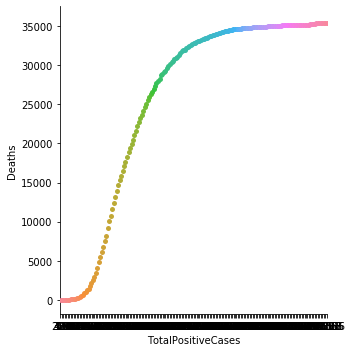

In [89]:
sns.catplot(x="TotalPositiveCases", y="Deaths", data=datac)